In [41]:
from google.cloud import bigquery as bq
import os
import pandas as pd
import pandas_gbq as pgbq
import util_functions as util
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext google.cloud.bigquery

service_credentials = 'Service_Credentials/big-query-horse-play-f37757d450b8.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = service_credentials

bq_client = bq.Client()

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [4]:
util.get_dataset_ids(bq_client)

Datasets in project - big-query-horse-play:
names_dataset
second_test


['names_dataset', 'second_test']

In [46]:
%%bigquery birth_df

SELECT
    source_year AS year,
    mother_age AS mom_age,
    COUNT(cigarettes_per_day) AS cigs_per_day
FROM `bigquery-public-data.samples.natality`
GROUP BY year, mom_age
ORDER BY year DESC
LIMIT 15

,year,mom_age,cigs_per_day
0,2008,15,323
1,2008,50,3
2,2008,13,8
3,2008,47,7
4,2008,31,4529
5,2008,28,7346
6,2008,12,0
7,2008,43,216
8,2008,37,1863
9,2008,25,9514


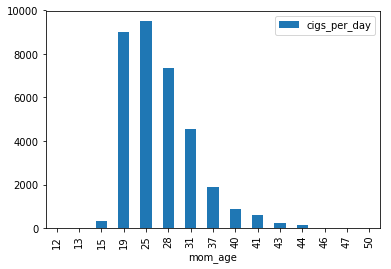

In [42]:
birth_df[['mom_age', 'cigs_per_day']].groupby(by='mom_age').mean().plot(kind='bar')

In [45]:
# But the above is the same as this
job_config = bq.job.QueryJobConfig()